# Library / Packages

In [1]:
# basic library
import pandas as pd
import numpy as np

# graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# pickle and .env
from dotenv import dotenv_values
import pickle

# Format

In [2]:
def lab_round(x, pos): 
    if abs(x) >= 1e9: 
        return f'{x/1e9} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3} K'
    
    else:
        return f'{x}'
    
def val_round(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} K'
    
    else:
        return f'{x:.2f}'

# Data Source

In [3]:
# parameter
share = {**dotenv_values('../.env.shared')} 

# read pickle
with open(share['CLEAN_DATA'], 'rb') as f:
    loaded_data = pickle.load(f)

market_df = pd.DataFrame(loaded_data)
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493927 entries, 2 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test_group     493927 non-null  object
 1   converted      493927 non-null  bool  
 2   total_ads      493927 non-null  int64 
 3   most_ads_day   493927 non-null  object
 4   most_ads_hour  493927 non-null  int64 
 5   week_cat       493927 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 23.1+ MB


In [4]:
market_df.tail()

,test_group,converted,total_ads,most_ads_day,most_ads_hour,week_cat
588096,ad,False,1,tuesday,23,weekday
588097,ad,False,1,tuesday,23,weekday
588098,ad,False,3,tuesday,23,weekday
588099,ad,False,1,tuesday,23,weekday
588100,ad,False,1,tuesday,23,weekday


# Visualization

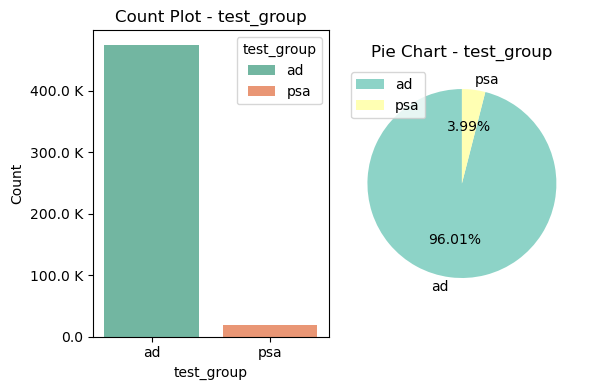

In [15]:
# specific column
var = 'test_group'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = market_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = market_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Count Plot - {var}', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # menambahkan teks pada batang
    ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
             f'{val_round(int(height))}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang

# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = market_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

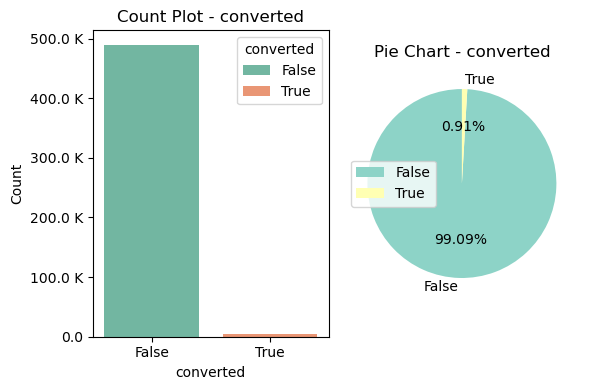

In [16]:
# specific column
var = 'converted'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = market_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = market_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Count Plot - {var}', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # menambahkan teks pada batang
    ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
             f'{val_round(int(height))}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang

# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = market_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

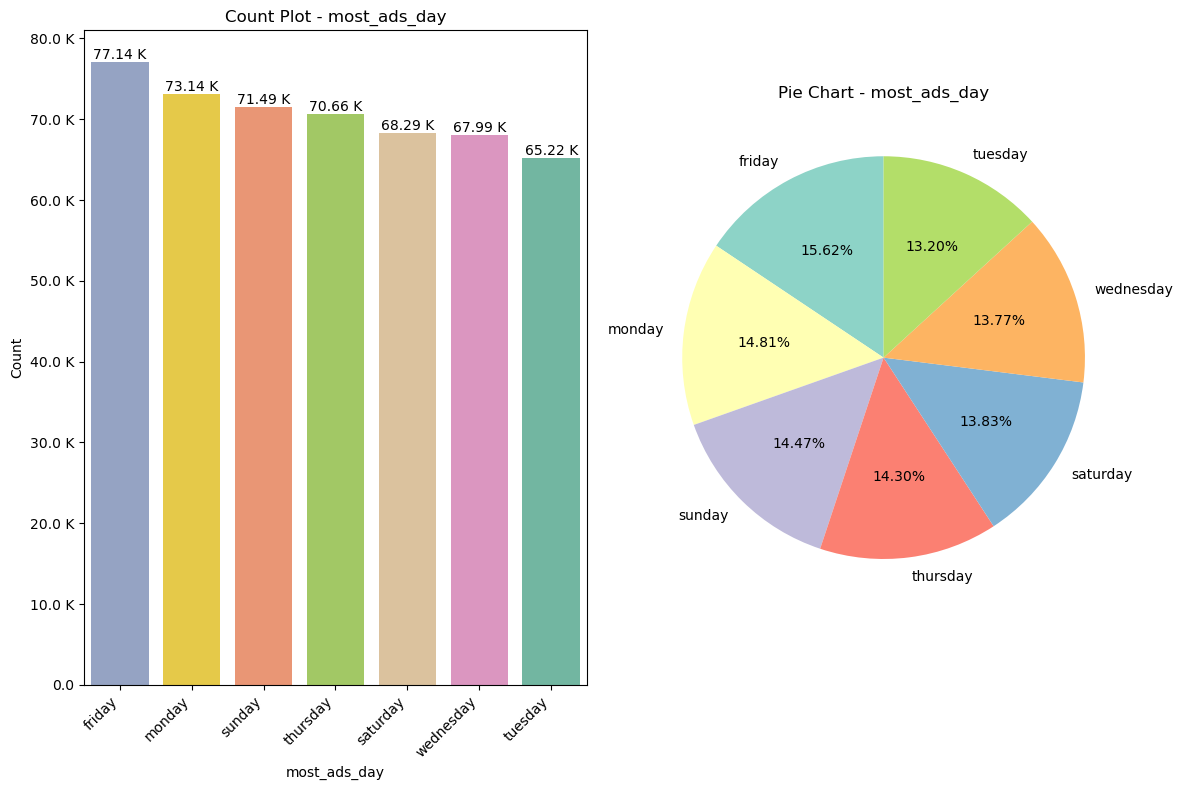

In [24]:
# specific column
var = 'most_ads_day'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = market_df, ax = ax1, hue = var, palette = 'Set2', order = market_df[var].value_counts().index) 

# Menambahkan judul dan label
ax1.set_title(f'Count Plot - {var}', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # menambahkan teks pada batang
    ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
             f'{val_round(int(height))}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10) 

# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = market_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.show()

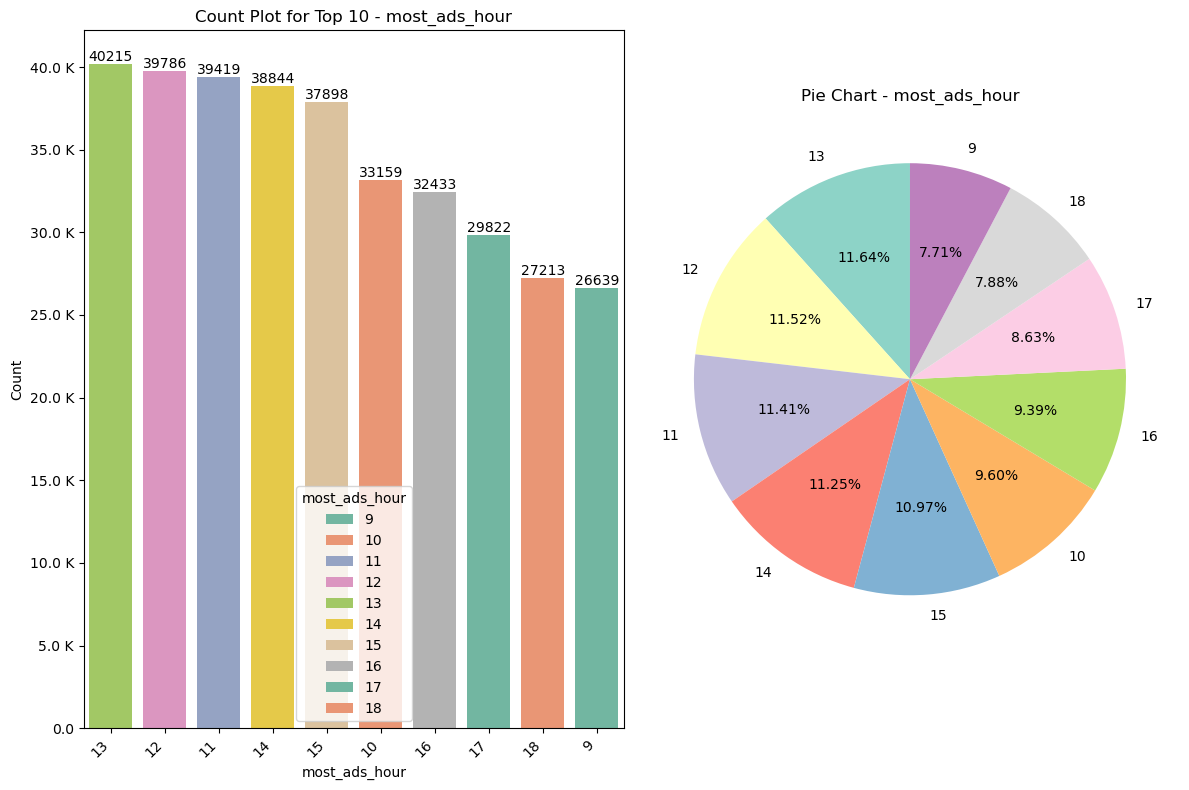

In [ ]:
# Specific column
var = 'most_ads_hour'

# Mengambil 10 kategori teratas berdasarkan jumlah kemunculannya
top_categories = market_df[var].value_counts().index[:10]

# Canvas
plt.figure(figsize = (12, 8))

# Count Plot dengan membatasi kategori yang ditampilkan
ax1 = plt.subplot(1, 2, 1)

# Filter data untuk menampilkan hanya kategori teratas atau "Others"
filtered_df = market_df[market_df[var].isin(top_categories)]

# Count Plot dengan filtered data
sns.countplot(x = var, data = filtered_df, ax = ax1, hue = var, palette = 'Set2', order = top_categories)

# Menambahkan judul dan label
ax1.set_title(f'Count Plot for Top 10 - {var}', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan teks pada setiap batang di countplot
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan teks jika nilai lebih besar dari nol
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,  # Menempatkan teks di atas batang
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Pie Chart dengan kategori teratas
ax2 = plt.subplot(1, 2, 2)
counts = market_df[var].value_counts()
# Hanya menampilkan kategori teratas untuk pie chart
top_counts = counts.head(10)
ax2.pie(top_counts, labels = top_counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(top_counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.show()
